# Sampling methods

In this notebook, we test differents methods of undersampling and oversampling

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, ClusterCentroids, NearMiss, NeighbourhoodCleaningRule, CondensedNearestNeighbour,RepeatedEditedNearestNeighbours, TomekLinks


# Read data that is already preprocessed (feature selection, normalization, etc.)
df = pd.read_csv('../data/interim/train_without_outliers.csv')


By displaying the distribution of the differents classes, we can see that the dataset is unbalanced. Depending on the classification algorithm we use, this could be a problem. We will try different methods of sampling.

<Axes: xlabel='class', ylabel='count'>

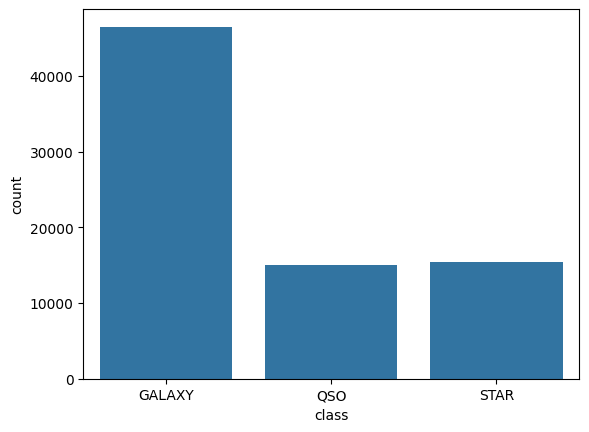

In [2]:
# Repartition of the classes without sampling methods 
sns.countplot(x='class', data=df)

In [3]:
# Print number of samples per class
print(df['class'].value_counts())


class
GALAXY    46482
STAR      15354
QSO       14963
Name: count, dtype: int64


In [28]:
# Prepare the data for the sampling methods
X = df.drop('class', axis=1)
y = df['class']

## 1. Oversampling

In [5]:
# RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_ros, y_ros = ros.fit_resample(X, y)


In [6]:
# Smote
sm = SMOTE(random_state=0)
X_sm, y_sm = sm.fit_resample(X, y)

In [7]:
# Adasyn
ada = ADASYN(random_state=0)
X_ada, y_ada = ada.fit_resample(X, y)

In [8]:
from sklearn.decomposition import PCA
import umap
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
reducer = umap.UMAP(n_components=2)

In [9]:
embedding_ros = reducer.fit_transform(X_ros)
embedding_sm = reducer.fit_transform(X_sm)
embedding_ada = reducer.fit_transform(X_ada)
embedding_original = reducer.fit_transform(X)


/usr/local/lib/python3.9/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/usr/local/lib/python3.9/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


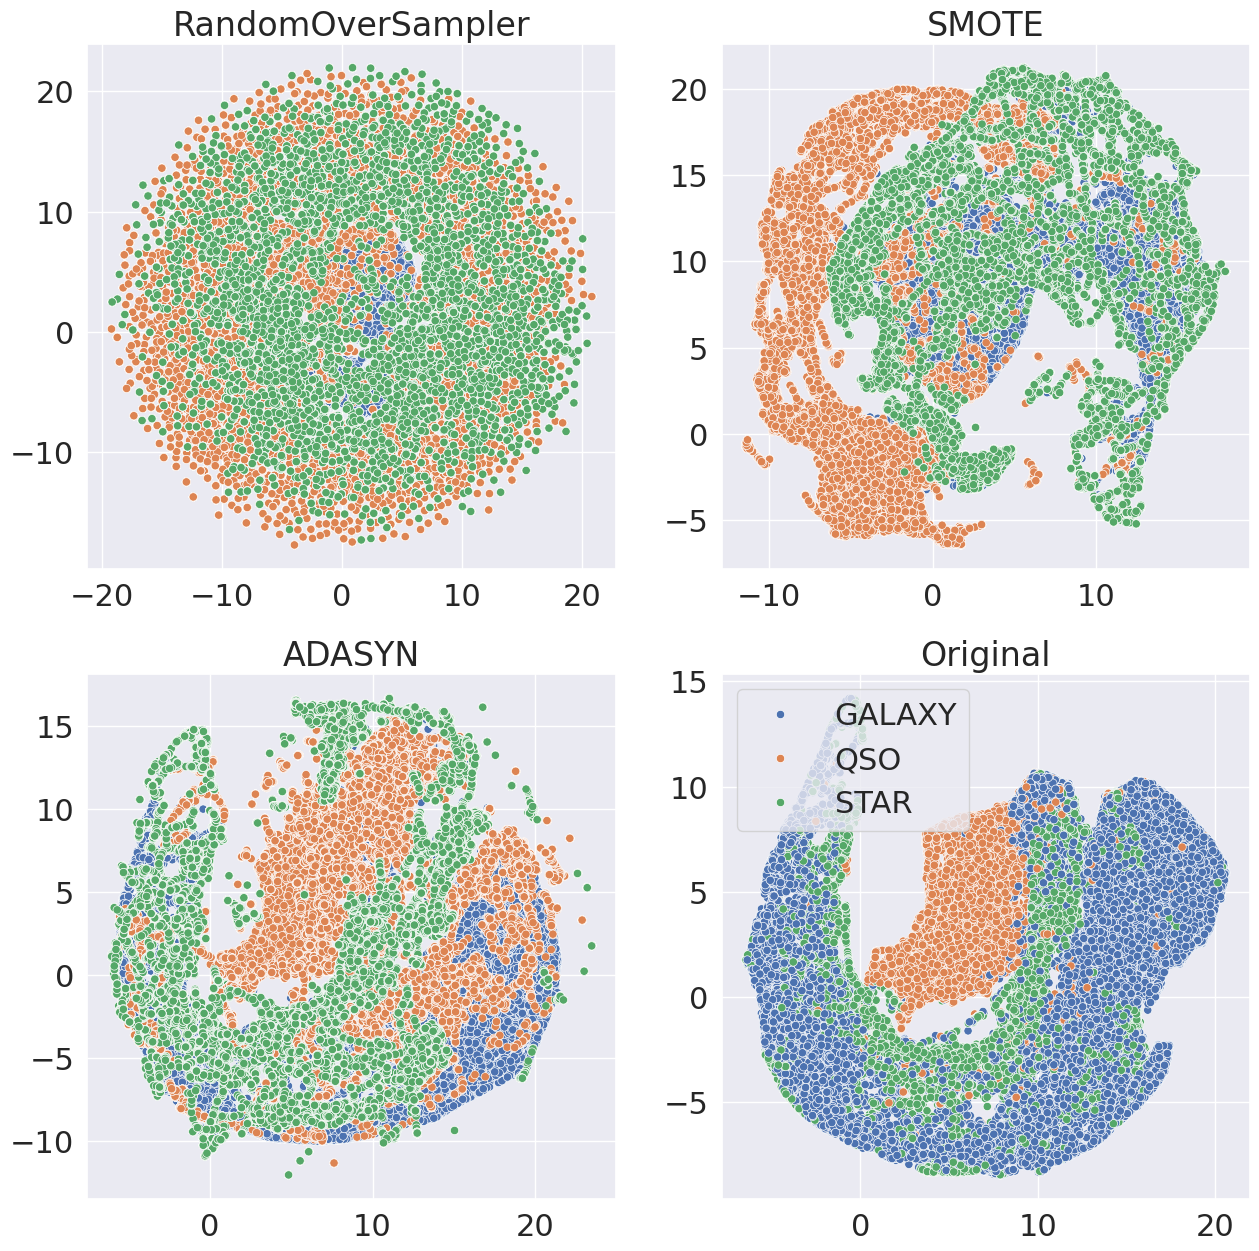

In [71]:
# Plot the umap representation of the data with class color
sns.set_context(None,font_scale=2, rc={"lines.linewidth": 2.5})
fg, axes = plt.subplots(2, 2, figsize=(15, 15))
axes = axes.flatten()
for i, (embed, title, y ) in enumerate(zip([embedding_ros, embedding_sm, embedding_ada, embedding_original], ['RandomOverSampler', 'SMOTE', 'ADASYN', 'Original'], [y_ros, y_sm, y_ada, df['class']])):
    sns.scatterplot(
        x=embed[:,0], y=embed[:,1],
        hue=y,
        ax=axes[i]
    )
    axes[i].set_title(title)
    axes[i].get_legend().remove()
plt.legend()

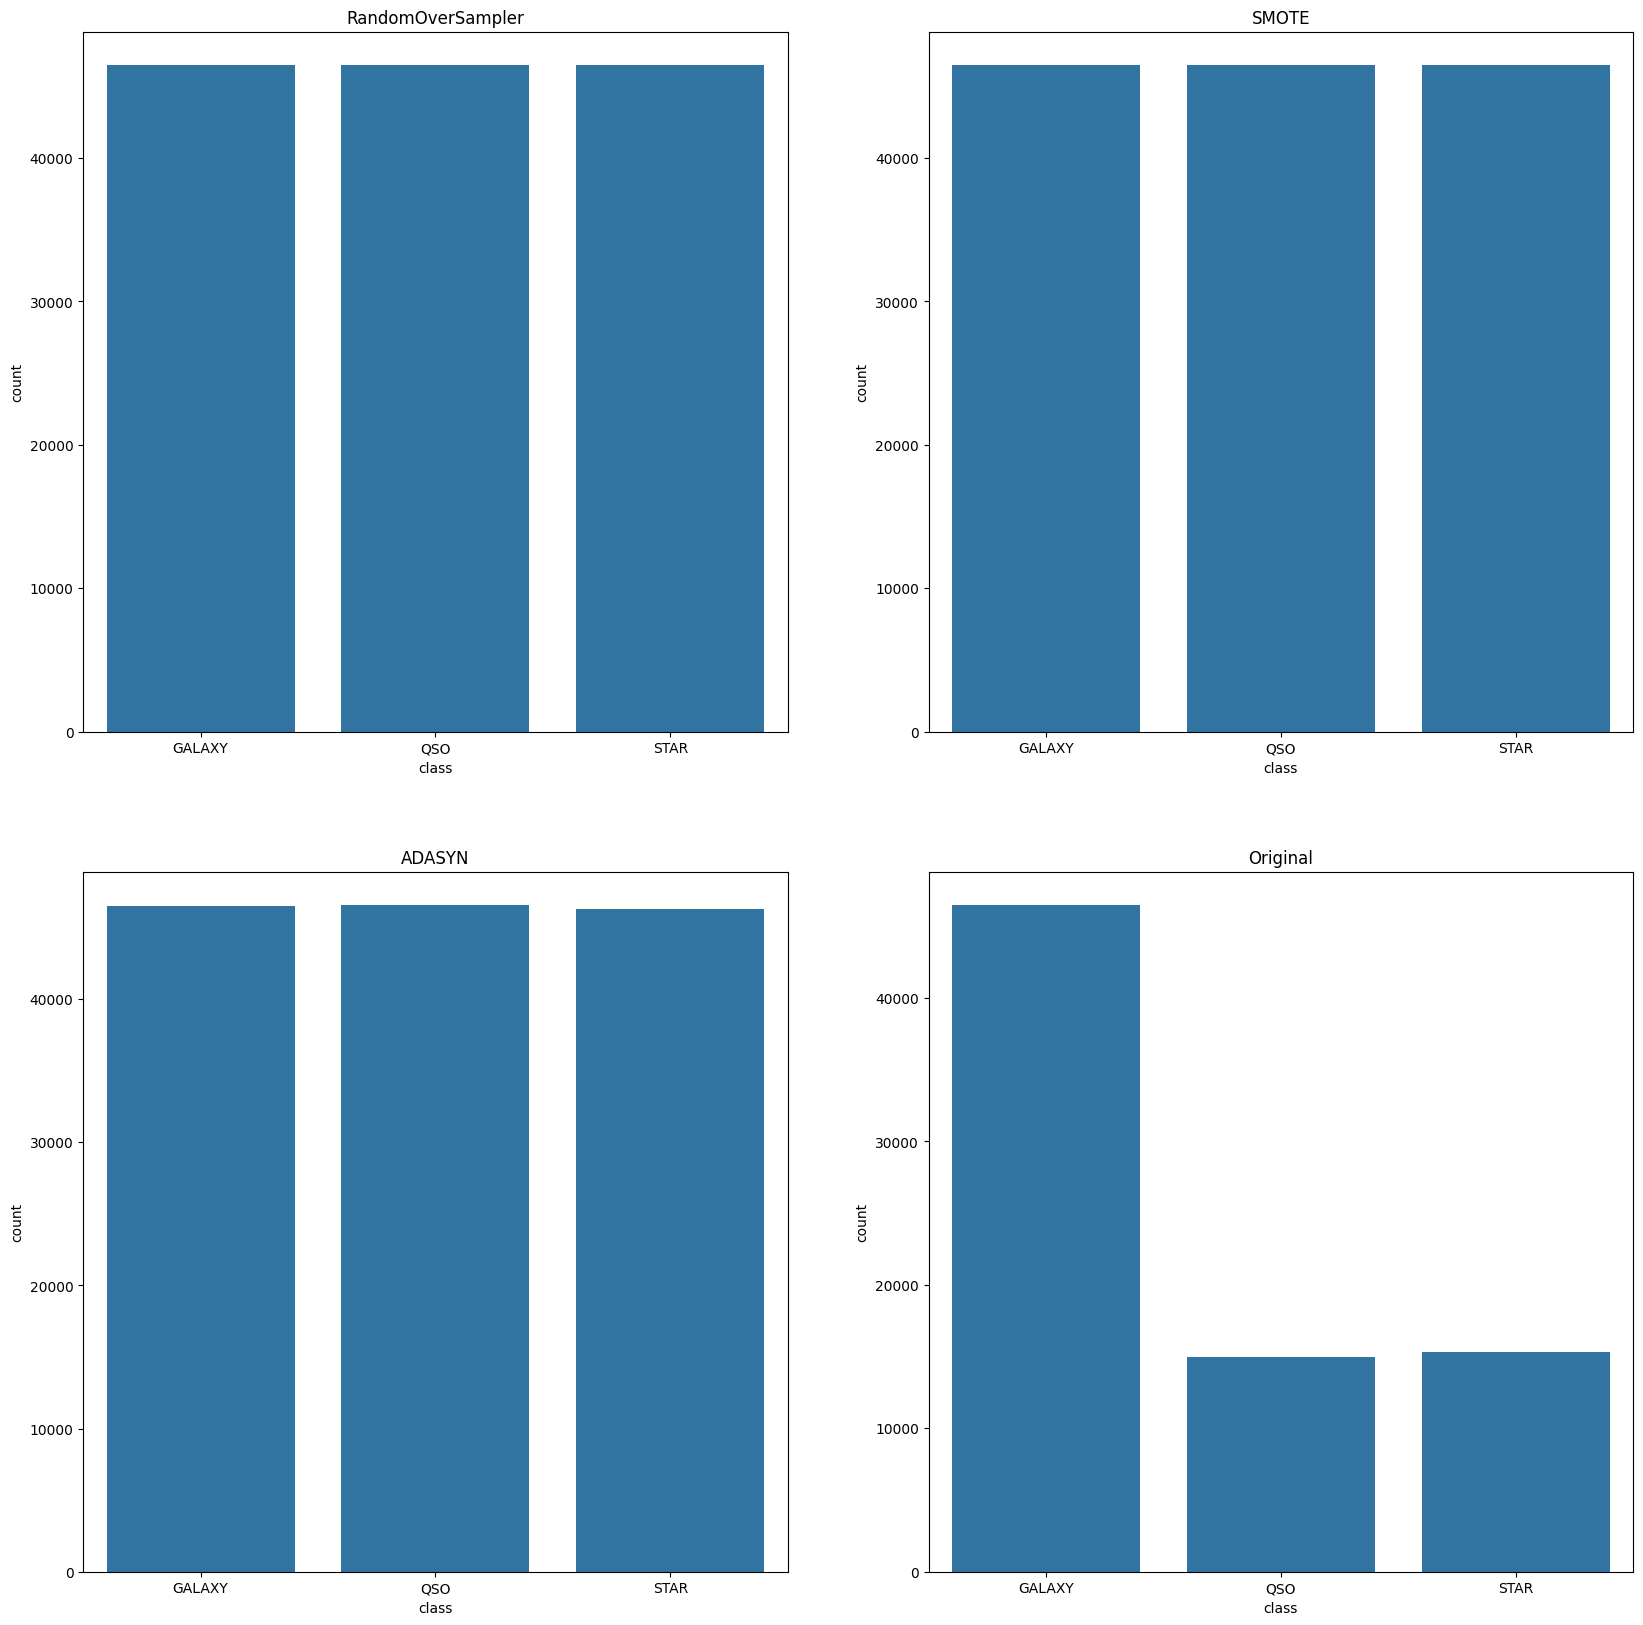

In [16]:
## Display distributions
plt.figure(figsize=(20, 20))
plt.subplot(2, 2, 1)
sns.countplot(x=y_ros)
plt.title('RandomOverSampler')
plt.subplot(2, 2, 2)
sns.countplot(x=y_sm)
plt.title('SMOTE')
plt.subplot(2, 2, 3)
sns.countplot(x=y_ada)
plt.title('ADASYN')
plt.subplot(2, 2, 4)
sns.countplot(x=df['class'])
plt.title('Original')
plt.show()


## 2. Undersampling

In [30]:
rus = RandomUnderSampler(random_state=0)
X_rus, y_rus = rus.fit_resample(X, y)


In [29]:
cc = ClusterCentroids(random_state=0)
print(X.shape)
print(y.shape)
X_cc, y_cc = cc.fit_resample(X, y)

(76799, 6)
(76799,)


/usr/local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [80]:
class_distribution = {'GALAXY': 14000}
nm3 = NearMiss(version=3,sampling_strategy=class_distribution)
X_nm3, y_nm3 = nm3.fit_resample(X, y)

/usr/local/lib/python3.9/site-packages/imblearn/under_sampling/_prototype_selection/_nearmiss.py:203: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  warnings.warn(


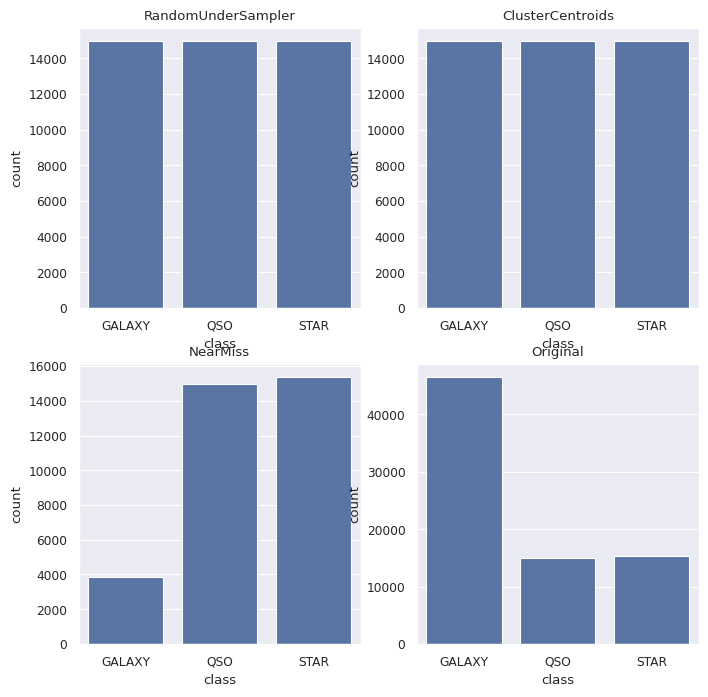

In [78]:
# Display distribution of the classes after undersampling methods
sns.set_context('paper')
fg, axes = plt.subplots(2,2, figsize=(8, 8))
axes = axes.flatten()
i=0
for X_s, y_s, title in zip([X_rus, X_cc, X_nm3, embedding_original], [y_rus, y_cc, y_nm3, df['class']], ['RandomUnderSampler', 'ClusterCentroids', 'NearMiss', 'Original']):
    sns.countplot(x=y_s, ax=axes[i])
    axes[i].set_title(title)
    i+=1


In [17]:
embedding_rus = reducer.fit_transform(X_rus)

In [18]:
embedding_cc = reducer.fit_transform(X_cc)

In [19]:
embedding_nm3 = reducer.fit_transform(X_nm3)

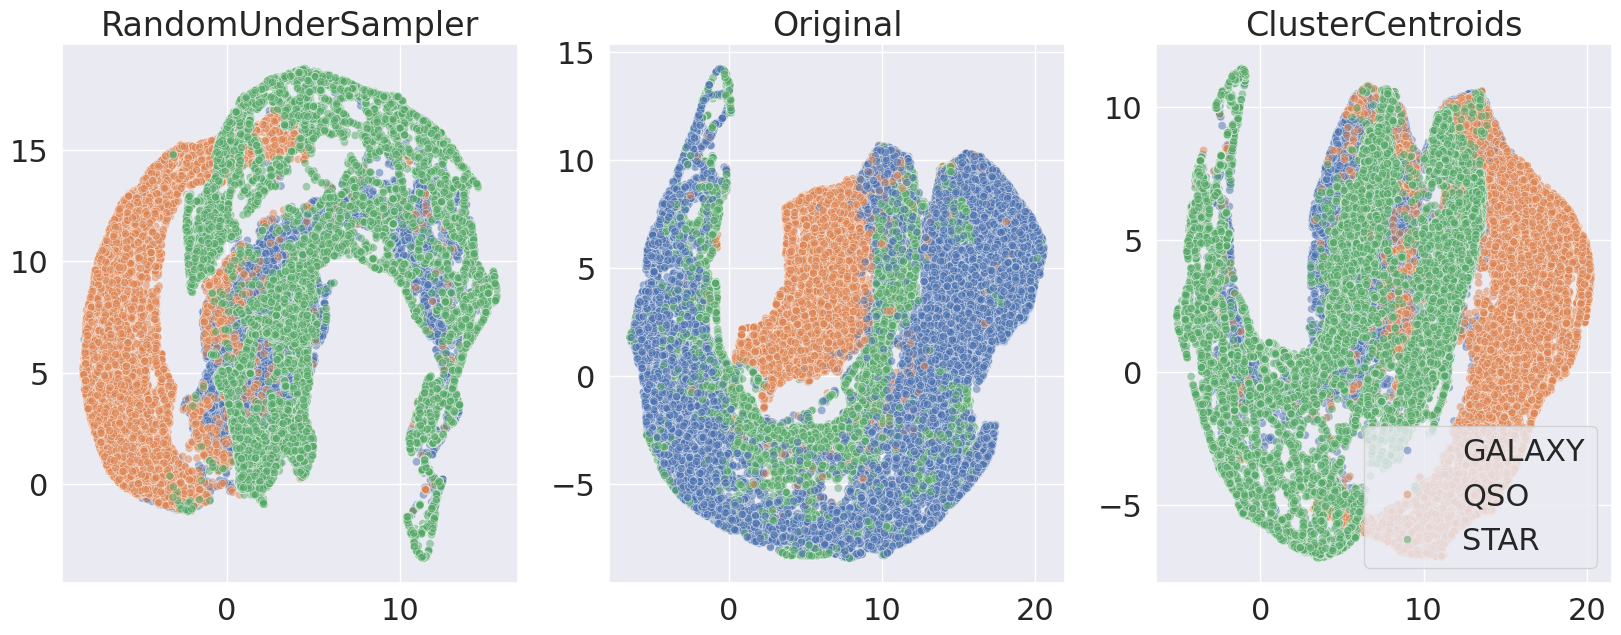

In [87]:
# Plot the pca representation of the data with class color
sns.set_context('notebook',font_scale=2, rc={"lines.linewidth": 2.5})
fg, axes = plt.subplots(1, 3,figsize=(20, 7))
axes = axes.flatten()

for i, (embed, title, y ) in enumerate(zip([embedding_rus, embedding_original, embedding_cc], ['RandomUnderSampler', 'Original', 'ClusterCentroids'], [y_rus, df['class'], y_cc])):
    sns.scatterplot(
        x=embed[:,0], y=embed[:,1],
        hue=y,
        legend='full',
        alpha=0.5,
        ax=axes[i]
    )
    #remove legend
    axes[i].get_legend().remove()
    axes[i].set_title(title)
plt.legend()
